### Group 3 : Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import csv
import urllib
import re
import string # to remove puntuations
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from nltk import word_tokenize
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
## Testing my codes:

review = TextBlob('''We arrived at the JFK airport in New York at 7.10 on a Tuesday. Apron arrival of the baggage claim, we were met with bad service and poo4r customer service. After waiting for an hour for our flight we went to the baggage service area. The workers obviously had better things to do, as it took them another hour to contact their manager. When they finally came, she just sat in the office typing away not helping us or giving us any updates except for saying that they were in fact loaded onto our plane and taken off, but they are unable to figure out where they were. I am on my way to a safari in South Africa, and was already pressed for time. There were two other people waiting there with us who had the same problem. I guess that paying for priority doesn’t mater because, in the end, we still lost our luggage. The moral of the story here is be cautious when flying and try to avoid Delta Air Lines.''')
review.sentiment

Sentiment(polarity=-0.0765151515151515, subjectivity=0.48569023569023567)

In [3]:
## CLEANING THE TEXT

### Lower case 

review_lower= review.lower()


### tokenize(Separate) paragraph into words.

review_token = review_lower.words
print(" Word Tokenize :\n", review_token)

### Remove punctuations

token= RegexpTokenizer(r'\w+')
review_punkt = token.tokenize(str(review_token))


### Remove stop words from a text

stop_words = set(stopwords.words('english'))

filtered_word = [w for w in review_punkt if not w in stop_words] 
  
filtered_word = [] 
  
for w in review_punkt: 
    if w not in stop_words: 
        filtered_word.append(w)    
#print(word_tokens)
print("\n" )
print("Clean data:\n", filtered_word)

 Word Tokenize :
 ['we', 'arrived', 'at', 'the', 'jfk', 'airport', 'in', 'new', 'york', 'at', '7.10', 'on', 'a', 'tuesday', 'apron', 'arrival', 'of', 'the', 'baggage', 'claim', 'we', 'were', 'met', 'with', 'bad', 'service', 'and', 'poo4r', 'customer', 'service', 'after', 'waiting', 'for', 'an', 'hour', 'for', 'our', 'flight', 'we', 'went', 'to', 'the', 'baggage', 'service', 'area', 'the', 'workers', 'obviously', 'had', 'better', 'things', 'to', 'do', 'as', 'it', 'took', 'them', 'another', 'hour', 'to', 'contact', 'their', 'manager', 'when', 'they', 'finally', 'came', 'she', 'just', 'sat', 'in', 'the', 'office', 'typing', 'away', 'not', 'helping', 'us', 'or', 'giving', 'us', 'any', 'updates', 'except', 'for', 'saying', 'that', 'they', 'were', 'in', 'fact', 'loaded', 'onto', 'our', 'plane', 'and', 'taken', 'off', 'but', 'they', 'are', 'unable', 'to', 'figure', 'out', 'where', 'they', 'were', 'i', 'am', 'on', 'my', 'way', 'to', 'a', 'safari', 'in', 'south', 'africa', 'and', 'was', 'alread

In [4]:
# fit my data into a count vectorizer.  It will assign a number to each word.

vectorizer  = CountVectorizer()
vectorizer.fit(filtered_word)

print(vectorizer.vocabulary_)

{'arrived': 9, 'jfk': 32, 'airport': 3, 'new': 41, 'york': 74, '10': 0, 'tuesday': 64, 'apron': 6, 'arrival': 8, 'baggage': 13, 'claim': 17, 'met': 39, 'bad': 12, 'service': 55, 'poo4r': 48, 'customer': 19, 'waiting': 70, 'hour': 31, 'flight': 26, 'went': 72, 'area': 7, 'workers': 73, 'obviously': 42, 'better': 14, 'things': 60, 'took': 62, 'another': 5, 'contact': 18, 'manager': 37, 'finally': 25, 'came': 15, 'sat': 53, 'office': 43, 'typing': 66, 'away': 11, 'helping': 30, 'us': 69, 'giving': 28, 'updates': 68, 'except': 22, 'saying': 54, 'fact': 23, 'loaded': 34, 'onto': 44, 'plane': 47, 'taken': 59, 'unable': 67, 'figure': 24, 'way': 71, 'safari': 52, 'south': 56, 'africa': 1, 'already': 4, 'pressed': 49, 'time': 61, 'two': 65, 'people': 46, 'problem': 51, 'guess': 29, 'paying': 45, 'priority': 50, 'mater': 38, 'end': 21, 'still': 57, 'lost': 35, 'luggage': 36, 'moral': 40, 'story': 58, 'cautious': 16, 'flying': 27, 'try': 63, 'avoid': 10, 'delta': 20, 'air': 2, 'lines': 33}


In [5]:
## Transform my data

vector = vectorizer.transform(filtered_word)
print(vector[:5])

  (0, 9)	1
  (1, 32)	1
  (2, 3)	1
  (3, 41)	1
  (4, 74)	1


In [6]:
!pip install vaderSentiment

In [7]:
## sentiment analysis using VADER.


# function to print sentiments 
 
def vader_sentiment_scores(text): 
  
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA_obj = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
    # Contains pos, neg, neu, and compound scores.
 
    polarity_dict = SIA_obj.polarity_scores(text) 
      
    print("Raw sentiment dictionary : ", polarity_dict) 
    print("polarity percentage of sentence ", polarity_dict['neg']*100, "% :: Negative") 
    print("polarity percentage of sentence ", polarity_dict['neu']*100, "% :: Neutral") 
    print("polarity percentage of sentence ", polarity_dict['pos']*100, "% :: Positive") 
  
    print("Overall polarity percentage of sentence", end = " :: ") 
  
    # Calculate overall sentiment by compound score
    if polarity_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif polarity_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral")

In [8]:
## Test how VADER sentiment performs

vader_sentiment_scores(review_lower)

Raw sentiment dictionary :  {'neg': 0.079, 'neu': 0.901, 'pos': 0.02, 'compound': -0.8733}
polarity percentage of sentence  7.9 % :: Negative
polarity percentage of sentence  90.10000000000001 % :: Neutral
polarity percentage of sentence  2.0 % :: Positive
Overall polarity percentage of sentence :: Negative


### Pandas DataFrame

In [9]:
#  We created a CSV file where we saved all the customers reviews on JFK airport

with open("C:/Users/isanj/OneDrive/Desktop/JFK Customers reviews.csv", encoding="utf8", errors='ignore') as f:
     df_sen = pd.read_csv(f)
df_sen.head(5)


,Customer_Nationality,Date,Reviews
0,UK,Mar-20,Worst airport Ive ever arrived into. Huge queu...
1,US,Mar-20,The security line set up is totally unreasonab...
2,UK,Feb-20,Dreadful experience! Nearly 3 hour wait with t...
3,Jordan,Jan-20,Worst ever arrival immigration process globall...
4,UK,Jan-20,Hundreds of people awaiting to get through arr...


In [10]:
# Create new df columns based on Polarity and Subjectivity of the texts.

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_sen['Polarity'] = df_sen['Reviews'].apply(pol)
df_sen['Subjectivity'] = df_sen['Reviews'].apply(sub)
df_sen.head()

,Customer_Nationality,Date,Reviews,Polarity,Subjectivity
0,UK,Mar-20,Worst airport Ive ever arrived into. Huge queu...,-0.195000,0.532500
1,US,Mar-20,The security line set up is totally unreasonab...,0.110417,0.474306
2,UK,Feb-20,Dreadful experience! Nearly 3 hour wait with t...,-0.380000,0.760000
3,Jordan,Jan-20,Worst ever arrival immigration process globall...,-0.250000,0.656250
4,UK,Jan-20,Hundreds of people awaiting to get through arr...,0.033333,0.633333


In [11]:
# View the statistical details of the dataframe

df_sen.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Polarity,67.0,-0.100277,0.166938,-0.56,-0.236063,-0.098030,0.023140,0.206503
Subjectivity,67.0,0.544742,0.139224,0.00,0.484773,0.559375,0.632275,0.870000


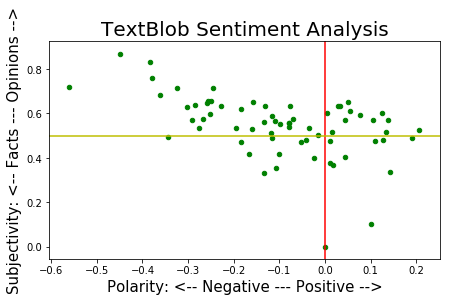

In [12]:
# Plot the results
import matplotlib.pyplot as plt

df_sen.plot.scatter(x ='Polarity', y ='Subjectivity', color = 'green', figsize =[7, 4])    
plt.title('TextBlob Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity: <-- Negative --- Positive -->', fontsize=15)
plt.ylabel('Subjectivity: <-- Facts --- Opinions -->', fontsize=15)
plt.axvline(0.0, color = 'r')
plt.axhline(0.5, color = 'y')
    
plt.show()

In [13]:
# Count rows with negative polarity

sum(n < 0 for n in df_sen["Polarity"]) # To calculate the % of negative reviews

44

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C21871AAC8>,
      dtype=object)

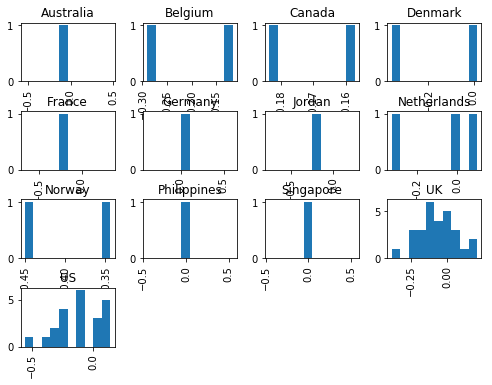

In [14]:
# Plot the polarity column by nationality

df_sen.hist(by='Customer_Nationality',
       column='Polarity',
       figsize=[8,6])

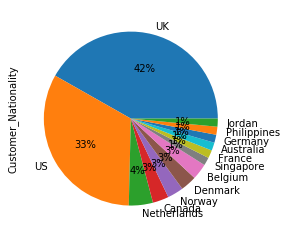

In [15]:
#Let's see the number of reviews by passengers' nationality

df_sen.Customer_Nationality.value_counts().plot(kind='pie', autopct='%1.0f%%')

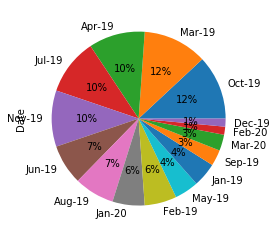

In [16]:
#Let's see the monthly percentage reviews 

df_sen.Date.value_counts().plot(kind='pie', autopct='%1.0f%%')

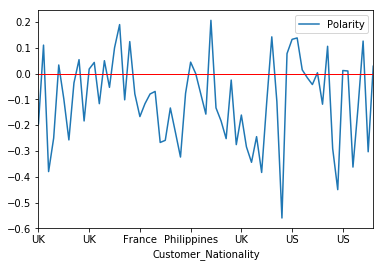

In [17]:
# Line plot

df_sen.plot(x ='Customer_Nationality', y='Polarity', kind = 'line')
plt.axhline(linewidth=1, color='r') # draw a hline at 'y' = 0
plt.show()

### Sentiment analysis using  Vader NLTK

In [18]:
### Use VADER sentiment on the dataframe

import nltk
nltk.download('vader_lexicon')

for i in range(len(df_sen)) :
    vader_sentiment_scores(df_sen.loc[i, "Reviews"])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Raw sentiment dictionary :  {'neg': 0.176, 'neu': 0.766, 'pos': 0.058, 'compound': -0.8906}
polarity percentage of sentence  17.599999999999998 % :: Negative
polarity percentage of sentence  76.6 % :: Neutral
polarity percentage of sentence  5.800000000000001 % :: Positive
Overall polarity percentage of sentence :: Negative
Raw sentiment dictionary :  {'neg': 0.063, 'neu': 0.728, 'pos': 0.208, 'compound': 0.9701}
polarity percentage of sentence  6.3 % :: Negative
polarity percentage of sentence  72.8 % :: Neutral
polarity percentage of sentence  20.8 % :: Positive
Overall polarity percentage of sentence :: Positive
Raw sentiment dictionary :  {'neg': 0.203, 'neu': 0.682, 'pos': 0.115, 'compound': -0.7177}
polarity percentage of sentence  20.3 % :: Negative
polarity percentage of sentence  68.2 % :: Neutral
polarity percentage of sentence  11.5 % :: Positive
Overall polarity percentage of sentence :: Negative
Raw sentiment dictionary :  {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound

polarity percentage of sentence  84.7 % :: Neutral
polarity percentage of sentence  4.3 % :: Positive
Overall polarity percentage of sentence :: Negative
Raw sentiment dictionary :  {'neg': 0.186, 'neu': 0.713, 'pos': 0.101, 'compound': -0.939}
polarity percentage of sentence  18.6 % :: Negative
polarity percentage of sentence  71.3 % :: Neutral
polarity percentage of sentence  10.100000000000001 % :: Positive
Overall polarity percentage of sentence :: Negative
Raw sentiment dictionary :  {'neg': 0.132, 'neu': 0.851, 'pos': 0.017, 'compound': -0.9424}
polarity percentage of sentence  13.200000000000001 % :: Negative
polarity percentage of sentence  85.1 % :: Neutral
polarity percentage of sentence  1.7000000000000002 % :: Positive
Overall polarity percentage of sentence :: Negative
Raw sentiment dictionary :  {'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.8637}
polarity percentage of sentence  26.3 % :: Negative
polarity percentage of sentence  73.7 % :: Neutral
polarity perce

Raw sentiment dictionary :  {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.9551}
polarity percentage of sentence  0.0 % :: Negative
polarity percentage of sentence  89.4 % :: Neutral
polarity percentage of sentence  10.6 % :: Positive
Overall polarity percentage of sentence :: Positive
Raw sentiment dictionary :  {'neg': 0.096, 'neu': 0.85, 'pos': 0.054, 'compound': -0.6486}
polarity percentage of sentence  9.6 % :: Negative
polarity percentage of sentence  85.0 % :: Neutral
polarity percentage of sentence  5.4 % :: Positive
Overall polarity percentage of sentence :: Negative
Raw sentiment dictionary :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
polarity percentage of sentence  0.0 % :: Negative
polarity percentage of sentence  100.0 % :: Neutral
polarity percentage of sentence  0.0 % :: Positive
Overall polarity percentage of sentence :: Neutral


In [19]:
## Add the sentiments column on the dataframe.

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments 
 
def vader_sentiment(row_text): 
    sentiment = ''
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA_obj = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
    # Contains pos, neg, neu, and compound scores.
 
    polarity_dict = SIA_obj.polarity_scores(row_text) 
        
    print("Raw sentiment dictionary : ", polarity_dict) 
    
    
      # Calculate overall sentiment by compound score
    if polarity_dict['compound'] >= 0.05 : 
        sentiment = "Positive" 
  
    elif polarity_dict['compound'] <= - 0.05 : 
        sentiment ="Negative" 
  
    else : 
        sentiment  ="Neutral"
        
    return sentiment


In [20]:
# Create a new dataframe column, called "Sentiment" to which we will assign the sentiment value.

for i in range(len(df_sen)) :
    row_text = df_sen.loc[i, "Reviews"] # select a the row in position i
    sentiment = vader_sentiment(row_text)# analize the sentiment of that row
    print('Sentiment: ', sentiment)
    df_sen.loc[i,'Sentiments'] = sentiment

Raw sentiment dictionary :  {'neg': 0.176, 'neu': 0.766, 'pos': 0.058, 'compound': -0.8906}
Sentiment:  Negative
Raw sentiment dictionary :  {'neg': 0.063, 'neu': 0.728, 'pos': 0.208, 'compound': 0.9701}
Sentiment:  Positive
Raw sentiment dictionary :  {'neg': 0.203, 'neu': 0.682, 'pos': 0.115, 'compound': -0.7177}
Sentiment:  Negative
Raw sentiment dictionary :  {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.6249}
Sentiment:  Negative
Raw sentiment dictionary :  {'neg': 0.0, 'neu': 0.934, 'pos': 0.066, 'compound': 0.34}
Sentiment:  Positive
Raw sentiment dictionary :  {'neg': 0.138, 'neu': 0.702, 'pos': 0.16, 'compound': 0.4201}
Sentiment:  Positive
Raw sentiment dictionary :  {'neg': 0.186, 'neu': 0.613, 'pos': 0.201, 'compound': -0.0699}
Sentiment:  Negative
Raw sentiment dictionary :  {'neg': 0.1, 'neu': 0.791, 'pos': 0.109, 'compound': 0.6787}
Sentiment:  Positive
Raw sentiment dictionary :  {'neg': 0.115, 'neu': 0.843, 'pos': 0.042, 'compound': -0.6893}
Sentiment:  Negat

In [21]:
# Print the first 5 rows of the dataframe

df_sen.head(5)

,Customer_Nationality,Date,Reviews,Polarity,Subjectivity,Sentiments
0,UK,Mar-20,Worst airport Ive ever arrived into. Huge queu...,-0.195000,0.532500,Negative
1,US,Mar-20,The security line set up is totally unreasonab...,0.110417,0.474306,Positive
2,UK,Feb-20,Dreadful experience! Nearly 3 hour wait with t...,-0.380000,0.760000,Negative
3,Jordan,Jan-20,Worst ever arrival immigration process globall...,-0.250000,0.656250,Negative
4,UK,Jan-20,Hundreds of people awaiting to get through arr...,0.033333,0.633333,Positive


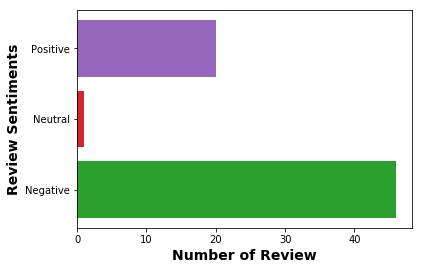

In [22]:
# Visualize the sentiments

Sentiment_count=df_sen.groupby('Sentiments').count()
plt.barh(Sentiment_count.index.values, Sentiment_count['Reviews'], color=['C2', 'C3', 'C4'])
plt.ylabel('Review Sentiments',fontweight= 'bold', fontsize = '14')
plt.xlabel('Number of Review', fontweight= 'bold', fontsize = '14')
plt.show()

In [23]:
# Count the values
df_sen['Sentiments'].value_counts(ascending=True)

Neutral      1
Positive    20
Negative    46
Name: Sentiments, dtype: int64

In [24]:
#Normalizing

df_sen['Sentiments'].value_counts(normalize=True)

Negative    0.686567
Positive    0.298507
Neutral     0.014925
Name: Sentiments, dtype: float64

### Using Naive Bayes

In [25]:
### Generate document term matrix by using scikit-learn's CountVectorizer

token= RegexpTokenizer(r'\w+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize )
text_counts= cv.fit_transform(df_sen['Reviews'])

print(cv.vocabulary_) # assign a number(weight) to each word


{'worst': 1548, 'airport': 93, 'ive': 730, 'arrived': 138, 'huge': 662, 'queues': 1065, 'probably': 1039, 'slowest': 1250, 'staff': 1276, 'despite': 391, 'door': 432, '2': 20, 'hours': 658, 'seen': 1196, 'chatting': 266, 'customers': 361, 'asking': 145, 'line': 785, 'talking': 1341, 'taking': 1339, 'age': 79, 'process': 1042, 'time': 1376, 'unfriendly': 1440, 'downright': 434, 'rude': 1139, 'security': 1193, 'checks': 272, 'set': 1210, 'totally': 1389, 'unreasonable': 1456, 'precheck': 1028, 'separate': 1204, 'clear': 284, 'machine': 821, 'placed': 999, 'tsa': 1419, 'allowing': 100, 'cut': 363, 'really': 1084, 'higher': 639, 'priority': 1037, 'announce': 113, 'people': 980, 'decide': 371, 'buy': 228, 'instead': 709, 'believe': 191, 'machines': 822, 'end': 463, 'area': 131, 'away': 169, 'confirmed': 319, 'like': 783, 'suspect': 1329, 'pays': 978, 'program': 1047, 'unofficial': 1451, 'advantage': 72, 'dreadful': 439, 'experience': 495, 'nearly': 893, '3': 30, 'hour': 657, 'wait': 1491, '

In [26]:
# print the count of each number assign to each word 

print(text_counts)

  (0, 272)	1
  (0, 1193)	1
  (0, 1139)	1
  (0, 434)	1
  (0, 1440)	1
  (0, 1376)	1
  (0, 1042)	1
  (0, 79)	1
  (0, 1339)	1
  (0, 1341)	1
  (0, 785)	1
  (0, 145)	1
  (0, 361)	1
  (0, 266)	1
  (0, 1196)	1
  (0, 658)	1
  (0, 20)	1
  (0, 432)	1
  (0, 391)	1
  (0, 1276)	2
  (0, 1250)	1
  (0, 1039)	1
  (0, 1065)	2
  (0, 662)	1
  (0, 138)	1
  :	:
  (65, 783)	1
  (65, 1376)	1
  (65, 785)	1
  (66, 860)	1
  (66, 613)	2
  (66, 1453)	1
  (66, 1429)	1
  (66, 174)	2
  (66, 1272)	1
  (66, 838)	1
  (66, 1282)	1
  (66, 448)	1
  (66, 550)	1
  (66, 94)	1
  (66, 786)	1
  (66, 1511)	1
  (66, 516)	1
  (66, 470)	1
  (66, 636)	1
  (66, 1204)	1
  (66, 1376)	1
  (66, 785)	3
  (66, 138)	1
  (66, 730)	1
  (66, 93)	1


In [27]:
# Transform a count matrix to a normalized  tf-idf representation
# tf-idf(Term Frequency - Inverse Document-Frequency ) helps to know the most significant words in a document

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(text_counts)
print(tfidf_transformer,"\n")

reviews_tfidf = tfidf_transformer.transform(text_counts)
print(reviews_tfidf)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True) 

  (0, 1548)	0.2231192102862809
  (0, 1440)	0.18921519168495865
  (0, 1376)	0.10485945326723847
  (0, 1341)	0.2009108519517124
  (0, 1339)	0.17157961608557593
  (0, 1276)	0.16582703694793977
  (0, 1250)	0.23724089102719562
  (0, 1196)	0.17157961608557593
  (0, 1193)	0.09708029072173928
  (0, 1139)	0.11655511353399221
  (0, 1065)	0.32916162575245833
  (0, 1042)	0.17157961608557593
  (0, 1039)	0.2009108519517124
  (0, 785)	0.14788964421862366
  (0, 730)	0.13524957701009271
  (0, 662)	0.17157961608557593
  (0, 658)	0.12207739185844521
  (0, 434)	0.23724089102719562
  (0, 432)	0.21598918051830363
  (0, 391)	0.21598918051830363
  (0, 361)	0.18921519168495865
  (0, 272)	0.23724089102719562
  (0, 266)	0.21598918051830363
  (0, 145)	0.23724089102719562
  (0, 138)	0.11655511353399221
  :	:
  (65, 43)	0.10319730206612363
  (65, 15)	0.1218581259097645
  (65, 5)	0.10319730206612363
  (66, 1511)	0.14327935392045923
  (6

In [28]:
print(reviews_tfidf.shape)

(67, 1573)


In [29]:
# Multinomial Naive Bayes Algorithm – It is used to classify on words occurrence.

model = MultinomialNB().fit(reviews_tfidf, df_sen['Sentiments'])

In [30]:
# Predict our model

all_predictions = model.predict(reviews_tfidf)
print(all_predictions)

['Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Positive' 'Negative' 'Negative' 'Negative' 'Negative' 'Positive'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative']


#### Preprocessing method:  Split train and test set (TF-IDF)

In [31]:
# Use Split train and test set (TF-IDF)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
reviews_tfidf, df_sen['Sentiments'], test_size=0.3, random_state=42)
    

In [32]:
# Model Generation Using Multinomial Naive Bayes

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6190476190476191


We got a classification rate of 61.90% using TF-IDF features, which is not considered as good accuracy.

We need to improve the accuracy by using some other preprocessing or feature engineering.

In [33]:
# Print confusion matrix of our prediction
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(df_sen['Sentiments'], all_predictions )

array([[46,  0,  0],
       [ 1,  0,  0],
       [18,  0,  2]], dtype=int64)

In [34]:
print(classification_report(df_sen['Sentiments'], all_predictions))

              precision    recall  f1-score   support

    Negative       0.71      1.00      0.83        46
     Neutral       0.00      0.00      0.00         1
    Positive       1.00      0.10      0.18        20

   micro avg       0.72      0.72      0.72        67
   macro avg       0.57      0.37      0.34        67
weighted avg       0.78      0.72      0.62        67



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix:
A confusion matrix is a summary of prediction results on a classification problem. 
The number of correct and incorrect predictions are summarized with count values and broken down by each class.

#### Another preprocessing: function train_test_split(CountVector(or BoW))

In [35]:
### Let's split dataset by using function train_test_split(). 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_sen['Sentiments'], test_size=0.3, random_state=1)

In [36]:
# Model Generation Using Multinomial Naive Bayes

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8095238095238095


We got a classification rate of 80.95% using train_test_split() features, which is considered as good accuracy.

In [37]:
# Identify the mains topics
# apply NMF

from sklearn.decomposition import NMF
idx_to_word = np.array(cv.get_feature_names())

nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(text_counts)
H = nmf.components_
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))

Topic 1: tell,staff,lady,rude,customs,just,sorry,flight,im,airport
Topic 2: philippine,seemingly,voucher,20,delayed,jfk,jetblue,terminal,s,flight
Topic 3: children,wand,droid,harry,potter,5,took,3,world,security
Topic 4: florida,happy,priority,make,love,4,people,coming,jfk,staff
Topic 5: security,really,airport,customers,placed,separate,tsa,clear,line,precheck
Topic 6: recommend,size,high,seating,quite,delta,gate,4,2,terminal
Topic 7: t,departures,going,guard,identify,hours,arrivals,spoke,flight,security
Topic 8: lot,treated,bags,uk,people,trays,rude,shouted,security,shoes
Topic 9: advice,score,hour,horrendous,customer,service,start,actually,1,queue
Topic 10: come,maybe,flights,way,control,experience,today,line,connecting,passengers
Topic 11: having,stars,like,2,1,restaurants,bad,really,food,jfk
Topic 12: 2,customs,jfk,queue,got,worst,just,experience,airport,t
Topic 13: staff,woman,ive,wait,long,burgers,limited,really,security,airport
Topic 14: totally,rude,hours,member,arrived,flight,

### ParallelDots

In [38]:
### We used Jupyter just to plot the paralleldots analysis

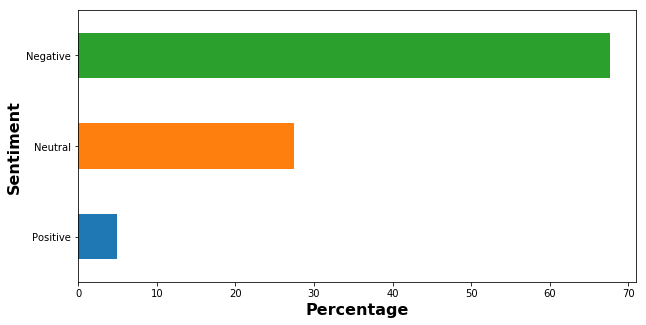

In [39]:
# Plot of sentiment table in ParallelDots

d = {'columns': ['Positive', 'Neutral', 'Negative'],
     'data': [[4.9, 27.5, 67.6]],
     'index': [1]}
df = pd.DataFrame(d['data'], columns=d['columns'], index=d['index'])
df.columns.names = ['Sentiment']

row = df.iloc[0]
row.plot(kind='barh', color=['C0', 'C1', 'C2'], figsize=(10,5))
plt.xlabel('Percentage', fontweight= 'bold', fontsize = '16')
plt.ylabel('Sentiment', fontweight= 'bold', fontsize = '16')
plt.show()


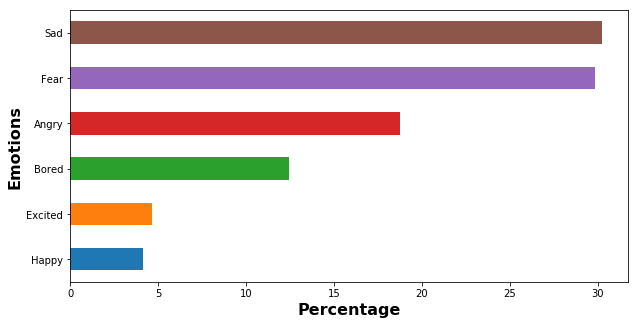

In [40]:
# Plot of the emotion table in ParallelDots

d = {'columns': ['Happy', 'Excited', 'Bored', 'Angry', 'Fear', 'Sad'],
     'data': [[4.12, 4.64, 12.46, 18.73, 29.84, 30.21]],
     'index': [1]} 
df = pd.DataFrame(d['data'], columns=d['columns'], index=d['index'])
#df.columns.names = ['Emotions']

row = df.iloc[0]
row.plot(kind='barh', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5'], figsize=(10,5))
plt.xlabel('Percentage', fontweight= 'bold', fontsize = '16')
plt.ylabel('Emotions', fontweight= 'bold', fontsize = '16')
plt.show()

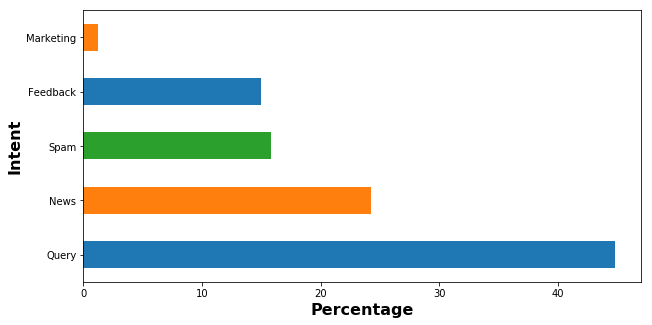

In [41]:
# # Plot of the intent table in ParallelDots

d = {'columns': ['Query', 'News', 'Spam', 'Feedback', 'Marketing'],
     'data': [[44.8, 24.20, 15.8, 14.98, 1.22]],
     'index': [1]}
df = pd.DataFrame(d['data'], columns=d['columns'], index=d['index'])
df.columns.names = ['Intent']

row = df.iloc[0]
row.plot(kind='barh', color=['C0', 'C1', 'C2'], figsize=(10,5))
plt.xlabel('Percentage', fontweight= 'bold', fontsize = '16')
plt.ylabel('Intent', fontweight= 'bold', fontsize = '16')
plt.show()